In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad, dblquad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:

#Funciones
f = lambda x: 1/np.sqrt(np.tan(x))
g = lambda x: np.cos(x)/x**3
h = lambda y,x: 1/np.sqrt(1-y**2)

x = sp.symbols('x')
#Arrays
x1 = np.linspace(0.001, np.pi/2, 100)
x2 = np.linspace(1, 5000, 100000)

#Para la primera integral
resultadof1, errorf1 = quad(f, 0, np.pi/2, epsabs=1e-5)
resultadof2 = trapezoid(f(x1), x1)
resultadof3 = simpson(f(x1), x=x1)
print(f"Resultado con método de cuadratura: {resultadof1}")
print(f"Resultado con método trapezoidal: {resultadof2}")
print(f"Resultado con métdo de simpson: {resultadof3}")

Resultado con método de cuadratura: 2.221441469079092
Resultado con método trapezoidal: 2.2777169633373733
Resultado con métdo de simpson: 2.2187515602037817


In [ ]:
#Para la segunda integral
resultadog1, errorg1 = quad(g, 1, 5000, epsabs=1e-5)
resultadog2 = trapezoid(g(x2), x2)
resultadog3 = simpson(g(x2), x=x2)
print(f"Resultado con método de cuadratura: {resultadog1}")
print(f"Resultado con método trapezoidal: {resultadog2}")
print(f"Resultado con métdo de simpson: {resultadog3}")

Resultado con método de cuadratura: 0.018117250230604523
Resultado con método trapezoidal: 0.018629929235664023
Resultado con métdo de simpson: 0.018119574953899386


In [ ]:
#Para la tercera integral
def integral_y(y):
  return 1 / np.sqrt(1 - y**2)

def integral_x(x):
  interna, error = quad(integral_y, 0, np.sin(x))
  return interna

resultadoh1 = quad(integral_x, 0, np.pi/4, epsabs=1e-5)[0]
print(f"Resultado con cuadratura: {resultadoh1}")

Resultado con cuadratura: 0.30842513753404244


In [ ]:
#Valores reales

x = sp.symbols('x')
y = sp.symbols('y')
f1 = 1/sp.sqrt(sp.tan(x))
g1 = sp.cos(x)/x**3

val_a=sp.integrate(f1, (x, 0, sp.pi/2)).evalf()
val_b=sp.integrate(g1, (x, 1, 5000)).evalf()

#Limites tercera integral
a,b = 0, np.pi/4
c,d = 0, lambda x: np.sin(x)
val_c = dblquad(h,a,b,c,d)[0]

In [ ]:
print(f"Valor real primera integral: {val_a}")
print(f"Valor real segunda integral: {val_b}")
print(f"Valor real tercera integral: {val_c}")

Valor real primera integral: 2.22144146907918
Valor real segunda integral: 0.0181176219727012
Valor real tercera integral: 0.30842513753404244


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



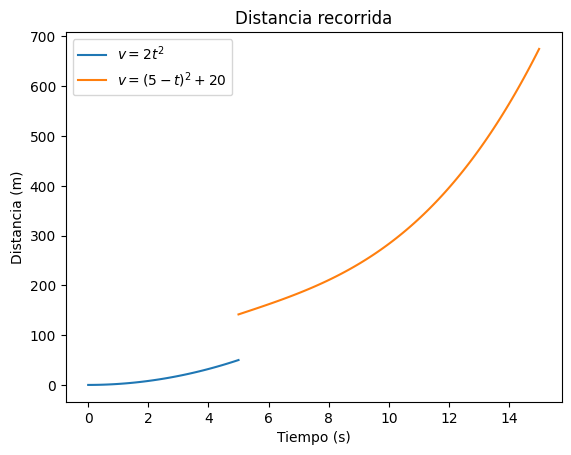

In [ ]:
#a)

t = sp.symbols('t')

v1 =  4*t
d1_ = sp.integrate(v1, t)
d1 = sp.lambdify(t, d1_, "numpy")

v2 = 20 + (5 - t)**2
d2_ = sp.integrate(v2, t)
d2 = sp.lambdify(t, d2_, "numpy")

tiempo1 = np.linspace(0, 5, 100)
tiempo2 = np.linspace(5, 15, 100)
distancia1 = d1(tiempo1)
distancia2 = d2(tiempo2)

plt.plot(tiempo1, distancia1, label=r'$v = 2t^2$')
plt.plot(tiempo2, distancia2, label=r'$v = (5−t)^2+20$')
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.title("Distancia recorrida")
plt.legend()

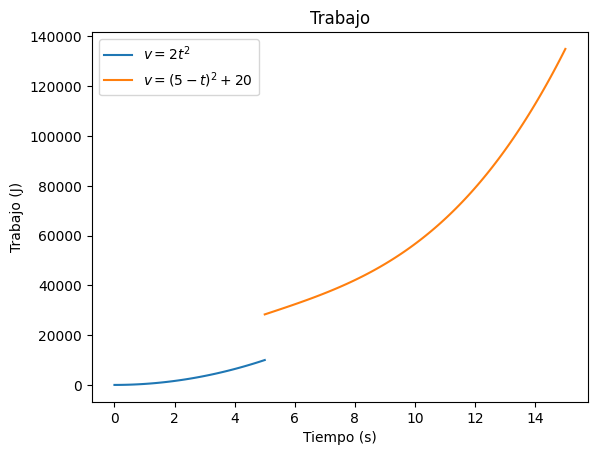

In [ ]:
#b)

trabajo1 = distancia1 * 200
trabajo2 = distancia2 * 200

plt.plot(tiempo1, trabajo1, label=r'$v = 2t^2$')
plt.plot(tiempo2, trabajo2, label=r'$v = (5−t)^2+20$')
plt.xlabel("Tiempo (s)")
plt.ylabel("Trabajo (J)")
plt.title("Trabajo")
plt.legend()

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


<ipython-input-9-874eb665ad50>:20: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  print(f"El resultado de la integral usando Romberg es {romberg(m, t1, t2)}")
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.164484e+28
  return fun(*args, **kwargs)


El resultado de la integral usando Romberg es 2.940179905272122e+33
El resultado de la integral usando Quad es 2.940179871152827e+33


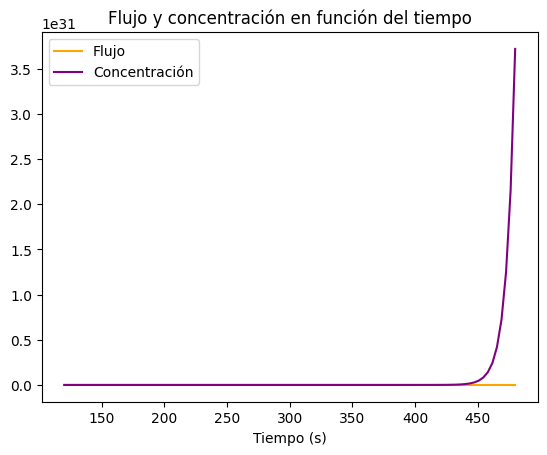

In [ ]:
t1 = 2*60   #Pasamos el tiempo a segundos
t2 = 8*60

#a)
tiempo3 = np.linspace(t1, t2, 100)
Qt = lambda t: 9 + 5 * (np.cos(0.4*t))**2
ct = lambda t: 5 * np.exp(-0.5*t) + 2 * np.exp(0.15*t)

flujo = Qt(tiempo3)
concentracion = ct(tiempo3)

plt.plot(tiempo3, flujo, color="orange", label="Flujo")
plt.plot(tiempo3, concentracion, color="purple", label="Concentración")
plt.xlabel("Tiempo (s)")
plt.title("Flujo y concentración en función del tiempo")
plt.legend()

#b)
m = lambda t: (9 + 5 * (np.cos(0.4*t))**2 ) * (5 * np.exp(-0.5*t) + 2 * np.exp(0.15*t))
print(f"El resultado de la integral usando Romberg es {romberg(m, t1, t2)}")

#c)
print(f"El resultado de la integral usando Quad es {quad(m, t1, t2)[0]}")

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
#Datos iniciales
L = 1.0
g = 9.8
theta0 = np.pi/4

k = np.sin(theta0/2)
p0 = 2*np.pi*np.sqrt(L/g)
sin_phi = lambda theta: np.sin(theta/2) / np.sin(theta0/2)
dfsin_phi = lambda theta: np.cos(theta/2) / (2*np.sin(theta0/2))
expr = lambda theta: dfsin_phi(theta)/np.sqrt(1-k**2*(sin_phi(theta))**2)

integral = quad(expr, 0, theta0)[0]

P = 2*p0/np.pi * integral
print(f"El periodo en este caso es {P:.4f}s")

El periodo en este caso es 1.3112s


In [ ]:
theta_s = sp.Symbol("theta_s")
sin_phi_ = sp.sin(theta_s/2) / sp.sin(theta0/2)
dfsin_phi_ = sp.cos(theta_s/2) / (2*sp.sin(theta0/2))
expr_ = dfsin_phi_/sp.sqrt(1-k**2*(sin_phi_)**2)

integral_exacta = sp.integrate(expr_,(theta_s,0,theta0)).evalf()

P_ = (2*p0/sp.pi * integral_exacta).evalf()
print(f"Con el valor exacto de la integral el periodo es {P_} s")

Con el valor exacto de la integral el periodo es 1.31119468038512 s


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
funcion5 = lambda t: 22.8 / (3.5 + 7*(t-1.25)**4)
autos = quad(funcion5, 0, 120)   #El limite superior es 120 minutos porque pasaron 2 horas
print(f"Entre las 4pm y 6pm pasaron {round(autos[0], 2)} autos aproximadamente")
print(f"El error es solo del {autos[1]*100}%")


Entre las 4pm y 6pm pasaron 11.66 autos aproximadamente
El error es solo del 2.2700275090511032e-08%


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
a = 1
i = 3

k_2 = lambda r, theta: 4*a*r*np.sin(theta) / (a**2+r**2+2*a*r*np.sin(theta))   #k**2
K_k = lambda r, theta, fi: 1/(np.sqrt(1-k_2(r, theta)**2*(np.sin(fi)**2)))   #K(k)
E_k = lambda r, theta, fi: np.sqrt(1-(k_2(r, theta)*np.sin(fi))**2)   #E(k)

Kk = lambda r, theta: quad(lambda fi: K_k(r, theta, fi), 0, np.pi/2)[0]
Ek = lambda r, theta: quad(lambda fi: E_k(r, theta, fi), 0, np.pi/2 )[0]


In [ ]:
funcion_A = lambda r, theta: 4*i*a / np.sqrt(a**2+r**2+2*a*r*np.sin(theta)) * ((2-k_2(r, theta))*Kk(r, theta)-2*Ek(r, theta))/k_2(r, theta)

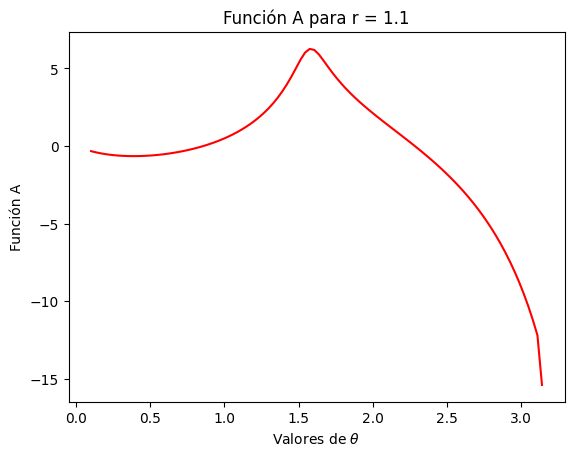

In [ ]:
#a)
angulos = np.linspace(0.1, np.pi, 100)

array_a = []
for i in angulos:
  j = funcion_A(1.1, i)
  array_a.append(j)
array_a = np.array(array_a)

plt.plot(angulos, array_a, color="red")
plt.xlabel(r'Valores de $\theta$')
plt.ylabel("Función A")
plt.title("Función A para r = 1.1")
plt.show()

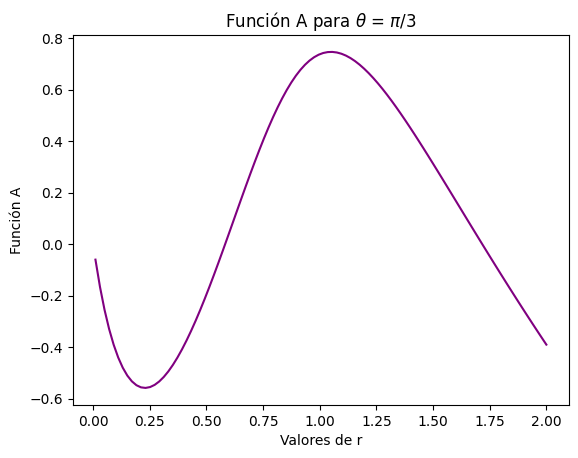

In [ ]:
#b
rs = np.linspace(0.01, 2, 100)

array_b = []
for i in rs:
  j = funcion_A(i, np.pi/3)
  array_b.append(j)
array_b = np.array(array_b)

plt.plot(rs, array_b, color="purple")
plt.xlabel("Valores de r")
plt.ylabel("Función A")
plt.title(r'Función A para $\theta$ = $\pi$/3')
plt.show()